In [11]:
import numpy as np
from numpy.linalg import inv, pinv, norm, cond
from matplotlib import pyplot as plt

In [12]:
# ns = [int(n) for n in np.logspace(1,3,8)]
n = 1000
k = 100
lamda = 100
scale = 1
e1s = np.logspace(-10,10,20)
e2 = 0
title_str = f'back_error_n={n}_k={k}_lambda={lamda}_e2={e2}'

In [13]:
def compute_SMW(n,k,A,B,U,V,lamda,e1,e2,rand_seed=1):
    np.random.seed(rand_seed)
    noise1 = np.random.normal(size=(n,n))
    noise1 *= e1/norm(noise1,ord=2)
    noise2 = np.random.normal(size=(k,k))
    noise2 *= e2/norm(noise2,ord=2)

    A_inv = inv(A)
    A_til_inv = A_inv + noise1
    Z_inv = inv(np.eye(k)+V.T@A_til_inv@U) + noise2
    B_inv_approx = A_til_inv - A_til_inv@U@Z_inv@V.T@A_til_inv
    error = norm(B-inv(B_inv_approx),ord=2)
    bound = 2*norm(A,ord=2)**2*e1
    # fullbound = 2*norm(A,ord=2)**2*e1 + bound*(cond(V)*norm(inv(A)@B,ord=2) + lamda*e1)**2
    return error,bound

In [14]:
errors = np.zeros_like(e1s,dtype=float)
bounds = np.zeros_like(e1s,dtype=float)

A = np.random.normal(size=(n,n),scale= scale)
U = np.random.normal(size=(n,k))
U /= norm(U, axis=0)
V = np.random.normal(size=(n,k))
V /= norm(V, axis=0)
B = A + lamda*U@V.T

for i,e1 in enumerate(e1s):
    errors[i],bounds[i] = compute_SMW(n,k,A,B,np.sqrt(lamda)*U,np.sqrt(lamda)*V,lamda,e1,e2)
    # print("n = %d, k = %d, e1 = %f, e2 = %f, norm(B^-1A) = %f"%(n,k,e1,e2,norm(inv(B)@A,ord=2)))
    # print("error = %f, bound = %f" %(errors[i],bounds[i]))

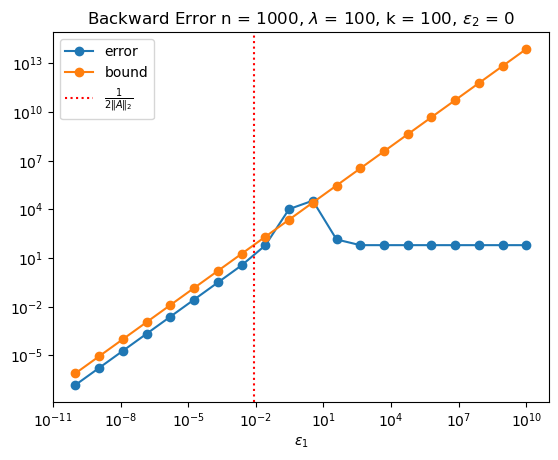

In [15]:
plt.loglog(e1s,errors,label='error',marker='o')
plt.loglog(e1s,bounds,label='bound',marker='o')
# plt.loglog(e2s,full_bounds,label='full bound',marker='o')
plt.axvline(x=1/2/norm(A,ord=2),ls=':',color='red',label=r'$\frac{1}{2 \|A\|_2}$')
plt.legend()
plt.xlabel(r'$\epsilon_1$')
plt.title(f'Backward Error n = {n}, '+r'$\lambda$'+f' = {lamda}, k = {k}, '+r'$\epsilon_2$'+f' = {e2}')  #'Approximation Error of '+r'$B^{-1}$'+'(Forward Error n = '+str(n)+ ' )'
plt.savefig('e2_zero_backward/'+title_str+'.png')
# plt.title(r'$\|{B^{-1}- \left(\widetilde{A}^{-1} -\widetilde{A}^{-1}U Z^{-1} V^T \widetilde{A}^{-1} \right) } \|_2$')


In [16]:
bounds-errors

array([ 6.34949487e-07,  7.16761610e-06,  8.09107736e-05,  9.13351455e-04,
        1.03102488e-02,  1.16384903e-01,  1.31364958e+00,  1.47982998e+01,
        1.46280689e+02, -8.12652849e+03, -8.22335136e+03,  2.98029703e+05,
        3.36579784e+06,  3.79950464e+07,  4.28903126e+08,  4.84162165e+09,
        5.46540604e+10,  6.16955744e+11,  6.96443021e+12,  7.86171271e+13])